## Initialization

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,GlobalAveragePooling2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet import ResNet50
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
import numpy as np
from PIL import Image

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [2]:
data = pd.read_csv('/datasets/faces/labels.csv')

train_datagen = ImageDataGenerator(rescale=1./255)

train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=data,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


## EDA

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


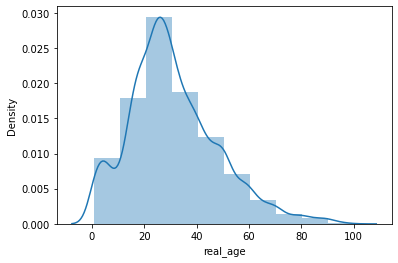

In [3]:
#Let's check the age distribution in our dataset.
sns.distplot(data['real_age'], bins=10);

In [4]:
features, target = next(train_gen_flow)

In [5]:
features.shape

(32, 224, 224, 3)

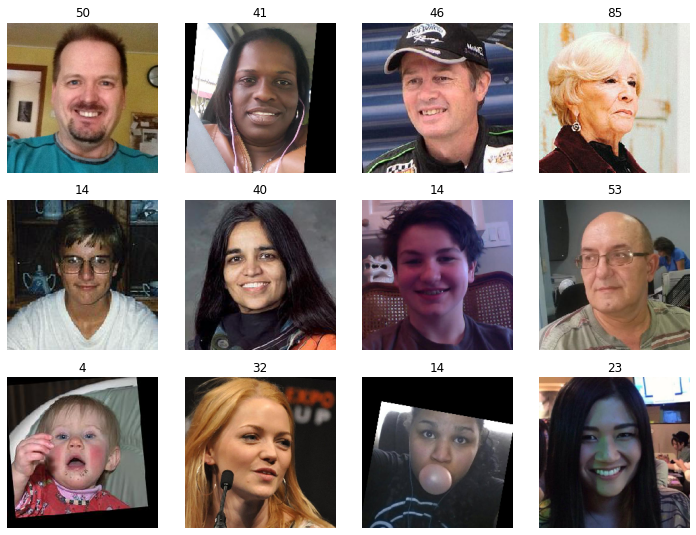

In [6]:
#Let's print 12 images to get an impression of our dataset.
plt.figure(figsize=(10, 10))
for image, target, i in zip(features[:12], target[:12], range(12)):
    plt.subplot(4, 4, i + 1)
    plt.imshow(image)
    plt.title(target)
    plt.axis("off")
plt.tight_layout()

### Findings

Findings:

1. The size of our dataset is 7591 images.
2. According to the distribution we presented, it can be seen that our data set consists (naturally, it should also be noted) of a majority of people over the age of 18, with most of our ages ranging from 20-40.
3. According to the loading of our random images, it can be seen that our data set consists of all types of people, and this is good for us because the model we trust will have a wide range that will fit and know how to identify every person.

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [ ]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
def load_train(path):
    
    """
    It loads the train part of dataset from path
    """
    
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(validation_split=0.25,rescale = 1/255)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode = 'raw',
        subset='training',
        seed=12345) 

    return train_gen_flow

In [ ]:
def load_test(path):
    
    """
    It loads the validation/test part of dataset from path
    """
    
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(validation_split=0.25,rescale = 1/255)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode = 'raw',
        subset='validation',
        seed=12345) 

    return test_gen_flow

In [ ]:
def create_model(input_shape):
    
    """
    It defines the model
    """
    backbone = ResNet50(weights='imagenet',input_shape=input_shape,include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    
    optimizer = Adam(lr=0.00025)
    
    model.compile(optimizer=optimizer, loss = 'mse', metrics=['mae'])
    
    return model

In [ ]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Trains the model given the parameters
    """

    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
        
    model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=1,
    )

    return model

## Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [ ]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('new2.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Output

Place the output from the GPU platform as an Markdown cell here.

ain for 356 steps, validate for 119 steps

Epoch 1/10
2022-09-30 19:22:29.224909: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-09-30 19:22:30.317139: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 58s - loss: 214.6127 - mae: 10.8042 - val_loss: 338.0067 - val_mae: 13.6519

Epoch 2/10
356/356 - 38s - loss: 88.8747 - mae: 7.1570 - val_loss: 217.0931 - val_mae: 11.0828

Epoch 3/10
356/356 - 38s - loss: 53.2569 - mae: 5.5998 - val_loss: 111.5600 - val_mae: 8.1239

Epoch 4/10
356/356 - 38s - loss: 35.4668 - mae: 4.5986 - val_loss: 126.6693 - val_mae: 8.5738

Epoch 5/10
356/356 - 38s - loss: 24.2519 - mae: 3.7433 - val_loss: 80.2257 - val_mae: 6.7362

Epoch 6/10
356/356 - 38s - loss: 17.4330 - mae: 3.2305 - val_loss: 80.1647 - val_mae: 6.6886

Epoch 7/10
356/356 - 37s - loss: 14.4576 - mae: 2.8918 - val_loss: 77.5363 - val_mae: 6.6604

Epoch 8/10
356/356 - 38s - loss: 12.6171 - mae: 2.7114 - val_loss: 79.7149 - val_mae: 6.8232

Epoch 9/10
356/356 - 38s - loss: 12.5990 - mae: 2.7432 - val_loss: 95.4519 - val_mae: 7.4175

Epoch 10/10
356/356 - 37s - loss: 13.0007 - mae: 2.7358 - val_loss: 74.0039 - val_mae: 6.5531
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
['...']

119/119 - 9s - loss: 74.0039 - mae: 6.5531
Test MAE: 6.5531

## Conclusions

Findings:

After training the model and performing an evaluation on the test set, we got the following results:
loss: 74.0039 - mae: 6.5531 Test MAE: 6.5531

The model is working and